# HOW TO RETRIEVE AND USE VOLCANO ALERT LEVEL (VAL) DATA

The data are available through the [GeoNet GitHub data repository](https://github.com/GeoNet/data/tree/main/volcanic-alert-levels), and more information on the dataset can be found there.

## &nbsp;Table of contents
### 1. Basic requirements
### 2. Data retrieval and basic graphing
### &nbsp;1. Basic Data Plot Using UTC
### &nbsp;2. Potential Use for Response Actions Using Local Time

## &nbsp;1. Basic requirements

### Import required Python modules/libraries

In [1]:
#pandas for data analysis
import pandas as pd

#matplotlib for graphing
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.dates import DateFormatter

#for datetime functionality
import datetime as dt
from dateutil import tz 

import warnings
warnings.simplefilter(action='ignore')

## &nbsp;2. Basic data retrieval and graphing

We will work with data from Whakaari White Island as there have been several recent changes and this provides material to better show how to use the data.

The dates and times of changes in VAL is provided in UTC to support easy integration with other GeoNet data sets which also use UTC.
Stakeholder groups that may be more interested in response actions to VAL changes are more likely to work in local time; the dates and times of VAL changes are also provided in NZST or NZDT to support those users.

In [2]:
url = 'https://raw.githubusercontent.com/GeoNet/data/main/volcanic-alert-levels/'

In [3]:
valfile = url+'VAL_WhakaariWhiteIsland.csv'
val = pd.read_csv(valfile)

In [4]:
val.tail()

,PeriodStart UTC,PeriodEnd UTC,VAL,VAL System Version,Description,PeriodStart LocalTime,PeriodEnd LocalTime
38,2024-05-24T05:00:00Z,2024-05-24T23:44:59Z,2,3,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,2024-05-24T23:45:00Z,2024-05-29T02:59:59Z,3,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2024-05-29T03:00:00Z,2024-08-09T04:59:59Z,2,3,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST
41,2024-08-09T05:00:00Z,2024-10-21T21:59:59Z,3,3,Minor volcanic eruption,2024-08-09T17:00:00 NZST,2024-10-22T10:59:59 NZDT
42,2024-10-21T22:00:00Z,9999-01-01T00:00:00Z,2,3,Moderate to heightened volcanic unrest,2024-10-22T11:00:00 NZDT,9999-01-01 00:00:00 NZST


#### Make VAL period end time suitable for datetime

The VAL data use `9999-01-01T00:00:00Z` as the end time of the current VAL, as is standard GeoNet practice. For the `LocalTime` data, `9999-01-01 00:00:00 NZST` is used, But neither of these can be converted to a python datetime value, so we replace them with the current date/time. This applies to both UTC and LocalTime so users can use either time base.

In [5]:
nowutc = dt.datetime.now(dt.timezone.utc).strftime('%Y-%m-%dT%H:%M:%SZ')
nownzst = dt.datetime.now().strftime('%Y-%m-%d %H:%M:%S NZST')
val.replace(['9999-01-01T00:00:00Z', '9999-01-01 00:00:00 NZST'], [nowutc, nownzst], inplace=True)
val[['PeriodStart UTC','PeriodEnd UTC']] = val[['PeriodStart UTC','PeriodEnd UTC']].apply(lambda x: pd.to_datetime(x,format='ISO8601'))

In [6]:
val.tail()

,PeriodStart UTC,PeriodEnd UTC,VAL,VAL System Version,Description,PeriodStart LocalTime,PeriodEnd LocalTime
38,2024-05-24 05:00:00+00:00,2024-05-24 23:44:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,2024-05-24 23:45:00+00:00,2024-05-29 02:59:59+00:00,3,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2024-05-29 03:00:00+00:00,2024-08-09 04:59:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST
41,2024-08-09 05:00:00+00:00,2024-10-21 21:59:59+00:00,3,3,Minor volcanic eruption,2024-08-09T17:00:00 NZST,2024-10-22T10:59:59 NZDT
42,2024-10-21 22:00:00+00:00,2025-03-13 23:25:10+00:00,2,3,Moderate to heightened volcanic unrest,2024-10-22T11:00:00 NZDT,2025-03-14 12:25:10 NZST


#### Select VAL data for 2024 onwards

Select on VAL data where end data is after 2024-01-01.

In [7]:
start = dt.datetime(2024,1,1).replace(tzinfo=dt.timezone.utc)
val24 = val[val['PeriodEnd UTC']>start]

In [8]:
val24

,PeriodStart UTC,PeriodEnd UTC,VAL,VAL System Version,Description,PeriodStart LocalTime,PeriodEnd LocalTime
36,2022-09-07 02:00:00+00:00,2024-05-23 22:44:59+00:00,2,3,Moderate to heightened volcanic unrest,2022-09-07 14:00:00 NZST,2024-05-24 10:44:59 NZST
37,2024-05-23 22:45:00+00:00,2024-05-24 04:59:59+00:00,3,3,Minor volcanic eruption,2024-05-24 10:45:00 NZST,2024-05-24 16:59:59 NZST
38,2024-05-24 05:00:00+00:00,2024-05-24 23:44:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,2024-05-24 23:45:00+00:00,2024-05-29 02:59:59+00:00,3,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2024-05-29 03:00:00+00:00,2024-08-09 04:59:59+00:00,2,3,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST
41,2024-08-09 05:00:00+00:00,2024-10-21 21:59:59+00:00,3,3,Minor volcanic eruption,2024-08-09T17:00:00 NZST,2024-10-22T10:59:59 NZDT
42,2024-10-21 22:00:00+00:00,2025-03-13 23:25:10+00:00,2,3,Moderate to heightened volcanic unrest,2024-10-22T11:00:00 NZDT,2025-03-14 12:25:10 NZST


### &nbsp;1. Basic Data Plot Using UTC 
The data are plotted as a "steps". As VAL values are assigned to a time interval interval, we have to plot `PeriodStart UTC` and `PeriodEnd UTC` to get the complete data, but with different steps. You can find an example of plotting these data as a line graph in a [data blog on the VAL dataset](https://www.geonet.org.nz/news/3fN5Mbo0RFkS8Bm0CmYcSl).

As VAL varies from 0 to 5, we fix the y-axis to that range. VAL 0-2 are levels of volcanic unrest,and 3-5 levels of eruptive activity. For clarity, we mark that boundary of the graph.

Text(0, 0.5, 'VAL')

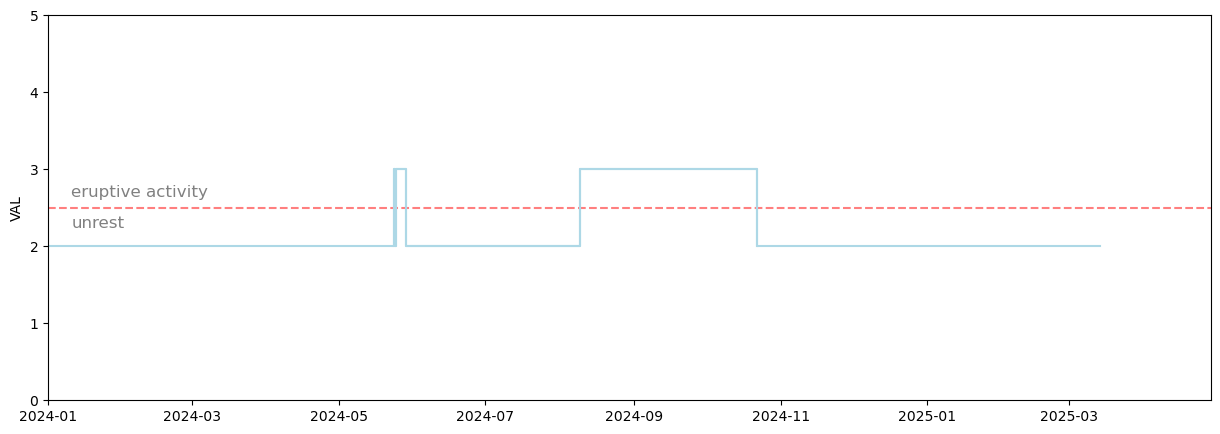

In [9]:
fig,ax = plt.subplots(1,1,figsize=(15,5))

#mark transition between unrest and eruptive activity in VAL schema
ax.axhline(2.5, linestyle='--', color='red', alpha=0.5)
ax.text(0.02, 0.48, 'unrest', fontsize=12, color='grey', va='top', transform=ax.transAxes)
ax.text(0.02, 0.52, 'eruptive activity', fontsize=12, color='grey', va='bottom', transform=ax.transAxes)

ax.step(val24['PeriodStart UTC'],val24['VAL'], where='post', color='lightblue')
ax.step(val24['PeriodEnd UTC'],val24['VAL'], where='pre', color='lightblue')
ax.set_xlim(left=start)
ax.set_ylim(0,5)
ax.set_yticks(list(range(0,6)))
ax.set_ylabel('VAL')


### &nbsp;2. Potential Use for Response Actions Using Local Time 
We consider a very short period of data in May 2024 when VAL changed three times in a few days.

Select relevant rows from the `val24` dataframe using the index value and convert LocalTime columns to a datetime variable.

Add some "dummy response" data to the graph.

In [10]:
may24 = val24.loc[37:40]
may24.drop(columns=['PeriodStart UTC', 'PeriodEnd UTC', 'VAL System Version'], inplace=True)
may24

,VAL,Description,PeriodStart LocalTime,PeriodEnd LocalTime
37,3,Minor volcanic eruption,2024-05-24 10:45:00 NZST,2024-05-24 16:59:59 NZST
38,2,Moderate to heightened volcanic unrest,2024-05-24 17:00:00 NZST,2024-05-25 11:44:59 NZST
39,3,Minor volcanic eruption,2024-05-25 11:45:00 NZST,2024-05-29 14:59:59 NZST
40,2,Moderate to heightened volcanic unrest,2024-05-29 15:00:00 NZST,2024-08-09 16:59:59 NZST


In [11]:
may24['PeriodEnd LocalTime'] = may24['PeriodEnd LocalTime'].str.replace('NZST', '+1200')
may24['PeriodEnd LocalTime'] = may24['PeriodEnd LocalTime'].str.replace('NZDT', '+1300')
may24['PeriodStart LocalTime'] = may24['PeriodStart LocalTime'].str.replace('NZST', '+1200')
may24['PeriodStart LocalTime'] = may24['PeriodStart LocalTime'].str.replace('NZDT', '+1300')

may24[['PeriodStart LocalTime','PeriodEnd LocalTime']] = may24[['PeriodStart LocalTime','PeriodEnd LocalTime']].apply(lambda x: pd.to_datetime(x, format='%Y-%m-%d %H:%M:%S %z'))

In [12]:
#need to tell matplotlib to use our local time zone, otherwise it plots in UTC
matplotlib.rcParams['timezone'] = 'Pacific/Auckland'

In [13]:
#dummy response data
NZ = tz.gettz('Pacific/Auckland')
evac = dt.datetime(2024,5,24,12, tzinfo=NZ)
evac_val = 3
canc = dt.datetime(2024,5,29,18, tzinfo=NZ)
canc_val = 2

Text(2024-05-29 18:00:00+12:00, 1.75, 'evacuation\ncancelled')

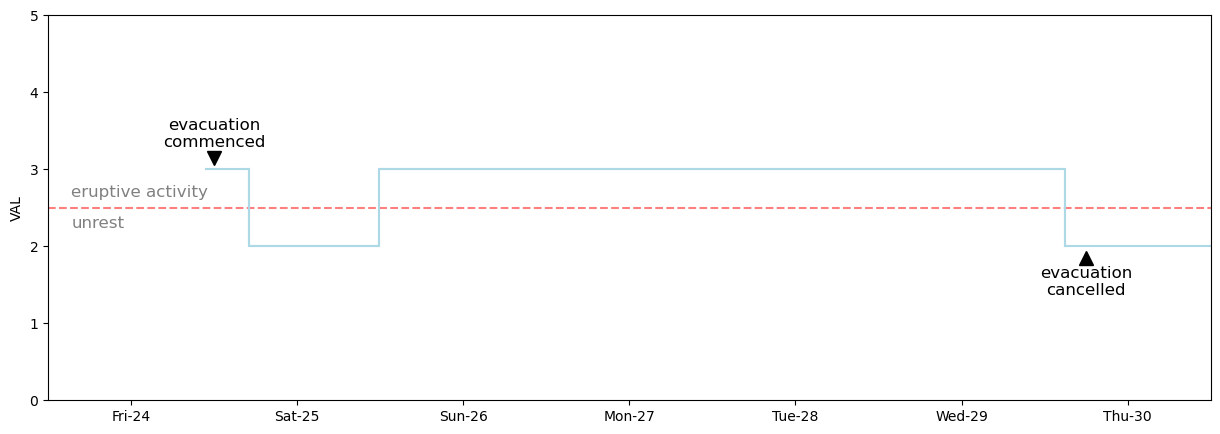

In [14]:
fig,ax = plt.subplots(1,1,figsize=(15,5))

#mark transition between unrest and eruptive activity in VAL schema
ax.axhline(2.5, linestyle='--', color='red', alpha=0.5)
ax.text(0.02, 0.48, 'unrest', fontsize=12, color='grey', va='top', transform=ax.transAxes)
ax.text(0.02, 0.52, 'eruptive activity', fontsize=12, color='grey', va='bottom', transform=ax.transAxes)

ax.step(may24['PeriodStart LocalTime'],may24['VAL'], where='post', color='lightblue')
ax.step(may24['PeriodEnd LocalTime'],may24['VAL'], where='pre', color='lightblue')

ax.set_xlim(left=dt.datetime(2024,5,23), right=dt.datetime(2024,5,30))
ax.set_ylim(0,5)
ax.set_yticks(list(range(0,6)))
ax.set_ylabel('VAL')

formatter = DateFormatter('%a-%d')
ax.xaxis.set_major_formatter(formatter)

#dummy response data
ax.plot(evac, evac_val+0.15, marker='v', markersize=10, color='black')
ax.text(evac, evac_val+0.25, 'evacuation\ncommenced', fontsize=12, color='black', ha='center', va='bottom')

ax.plot(canc, canc_val-0.15, marker='^', markersize=10, color='black')
ax.text(canc, canc_val-0.25, 'evacuation\ncancelled', fontsize=12, color='black', ha='center', va='top')